In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
from scipy import stats
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import pickle
import csv

In [4]:
rlist = []
records = 'mit-bih-dataframes/subject_list.csv' # Replace the _______ with the name of the records file in your MIT-BIH data folder
with open(records) as rfile: #Then we open the file 
                             #The 'with' command only opens the file while we are in it. Automatically closes the file when we're not    
    recordreader = csv.reader(rfile, delimiter=' ', quotechar='|')
    for row in recordreader:
        rlist.append(row[0])

In [5]:
subject_rr_rhythms = []
for x in tqdm(rlist):
    subject_rr_rhythms.append(pd.read_csv('mit-bih-extracted/'+x+'_rr_rhythms.csv', index_col=0))

100%|███████████████████████████████████████████| 23/23 [00:00<00:00, 53.43it/s]


In [6]:
rr_ints = []

for subject in tqdm(subject_rr_rhythms):
    #subject_rr_ints = []
    #with open('mit-bih-extracted/'+x+'_rr_ints.csv') as rfile:
    #    recordreader = csv.reader(rfile, delimiter=' ', quotechar='|')
    #    for row in recordreader:
    #        subject_rr_ints.append(int(row[0])/250) #importing each row divided by 250 because they were measured at 250 samples per second (converting it to seconds)
    #rr_ints.append(subject_rr_ints)
    rr_ints.append(subject[(np.abs(stats.zscore(subject['rr_int'])) < 4)].reset_index(drop=True))

rr_ints[22].tail()

100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 172.88it/s]


,rr_int,rr_int_seconds,rhythms
59475,173,0.692,A
59476,157,0.628,A
59477,68,0.272,A
59478,69,0.276,A
59479,53,0.212,A


In [29]:
def plot_time_plot(selection, nrows, ncols, title):
    plt.figure(figsize=(28, 12))
    
    for idx, x in enumerate(selection):
        ax = plt.subplot(nrows, ncols, idx + 1)
        ax.set_title('Subject '+str(x), fontsize=28)
        ax.set_xlabel('RR-Intervals elapsed', fontsize=24)
        ax.set_ylabel('RR-Interval length (seconds)', fontsize=24)
        ax.tick_params(labelsize=22)

        df = rr_ints[x-1]

        current = df['rhythms'][0]
        currentdata = []
        lastidx = 0
        counter = 0
        print("Plot "+str(idx+1)+", Subject "+str(x))
        for index, row in tqdm(df.iterrows()):
            if index == len(df)-1:
                currentdata.append(row['rr_int_seconds'])
                if current == 'N':
                    ax.plot(list(range(lastidx, index+1)), currentdata, color='darkcyan')
                elif current == 'A':
                    ax.plot(list(range(lastidx, index+1)), currentdata, color='orange')
                elif current == 'O':
                    ax.plot(list(range(lastidx, index+1)), currentdata, color='salmon')
            elif row['rhythms'] == current:
                currentdata.append(row['rr_int_seconds'])
            else:
                if current == 'N':
                    ax.plot(list(range(lastidx, index)), currentdata, color='darkcyan')
                elif current == 'A':
                    ax.plot(list(range(lastidx, index)), currentdata, color='orange')
                elif current == 'O':
                    ax.plot(list(range(lastidx, index)), currentdata, color='salmon')
                lastidx = index
                current = row['rhythms']
                currentdata = [row['rr_int_seconds']]

    plt.suptitle(title, fontsize=36)

    normal_patch = mpatches.Patch(color='darkcyan', label='Normal')
    afib_patch = mpatches.Patch(color='orange', label='Afib')
    other_patch = mpatches.Patch(color='salmon', label='Other')
    plt.figlegend([normal_patch, afib_patch, other_patch], 
                ['Normal', 'Afib', 'Other'],
                fontsize=28, 
                loc = "upper right",
                shadow = True)
    plt.tight_layout()

Plot 1, Subject 1


43401it [00:01, 21814.96it/s]


Plot 2, Subject 10


45259it [00:02, 21903.97it/s]


Plot 1, Subject 15


59883it [00:02, 21357.17it/s]


Plot 2, Subject 21


58780it [00:02, 20067.61it/s]


Plot 1, Subject 2


61451it [00:02, 20838.83it/s]


Plot 2, Subject 19


59081it [00:02, 22036.75it/s]


Plot 1, Subject 7


53592it [00:02, 21621.32it/s]


Plot 2, Subject 17


36486it [00:01, 22268.99it/s]


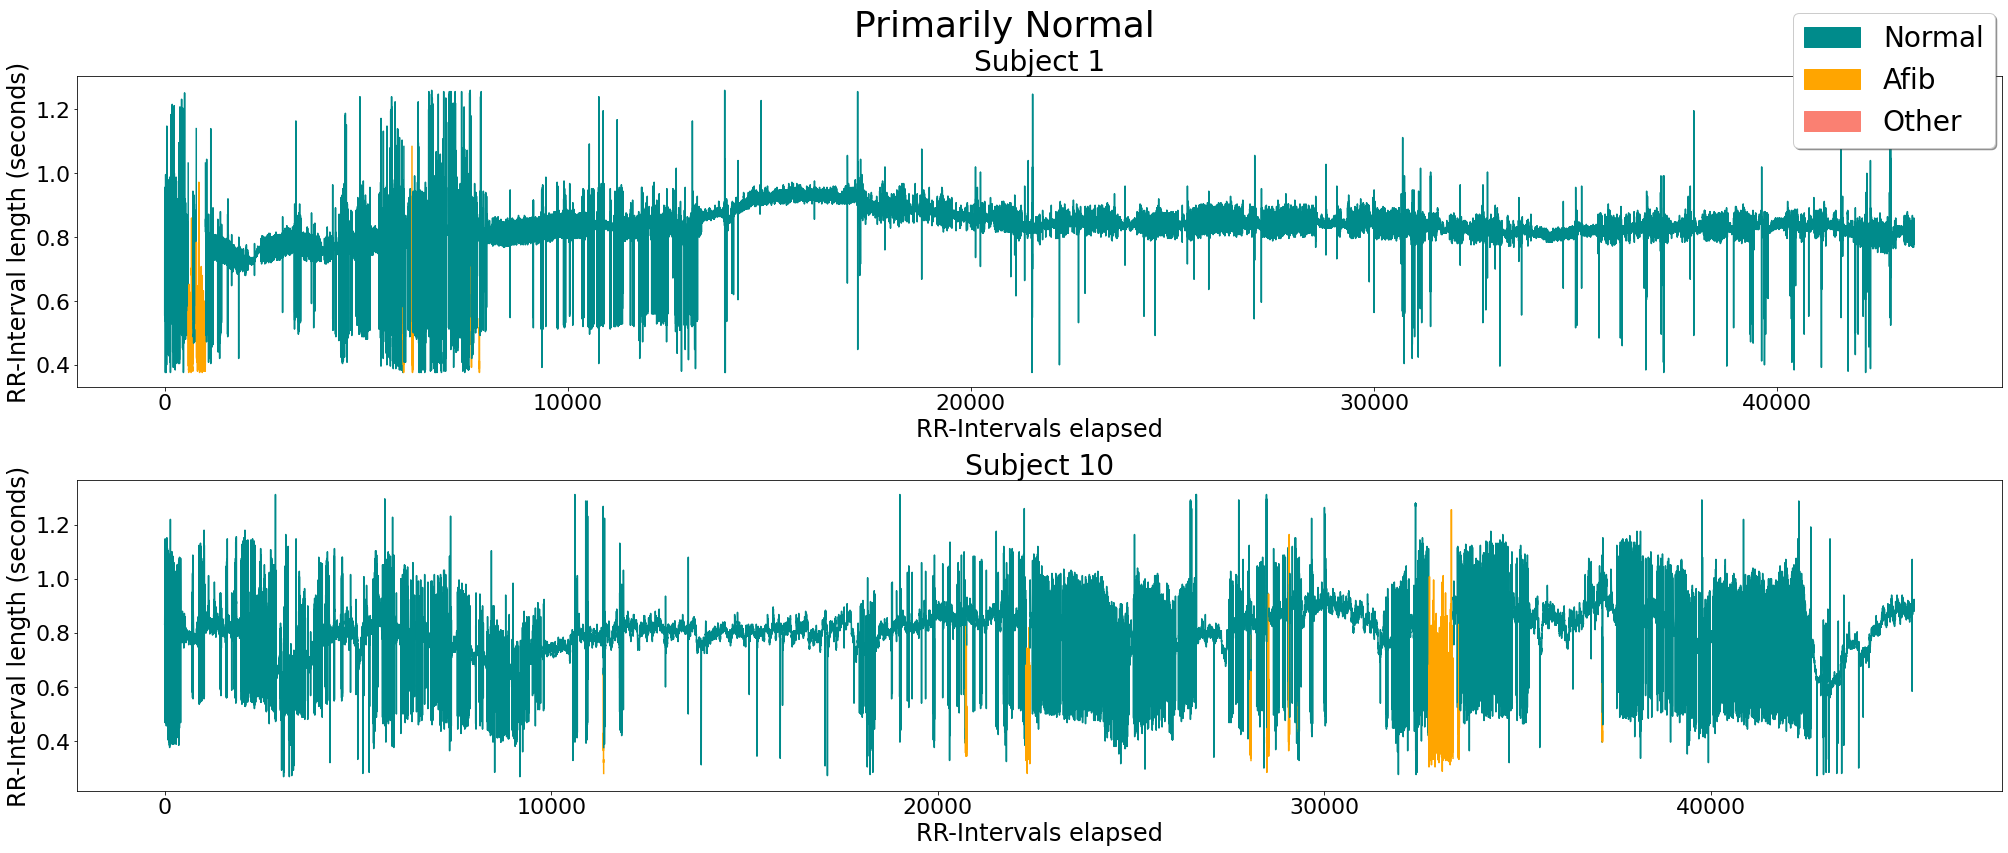

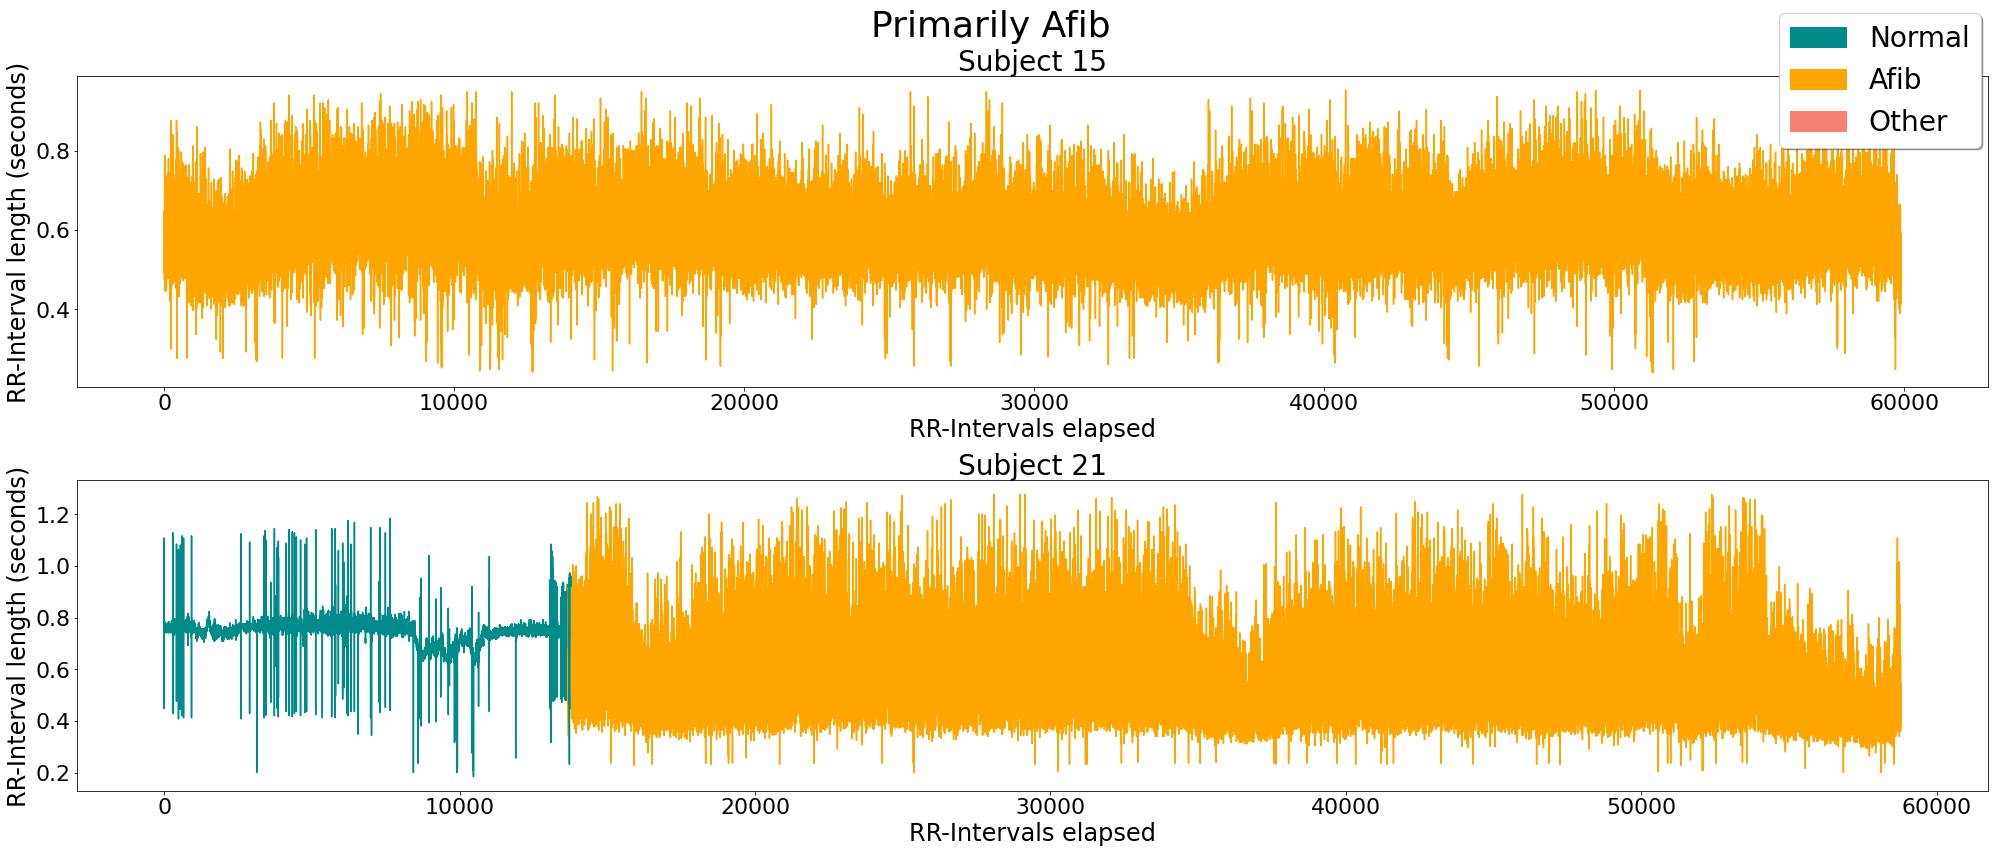

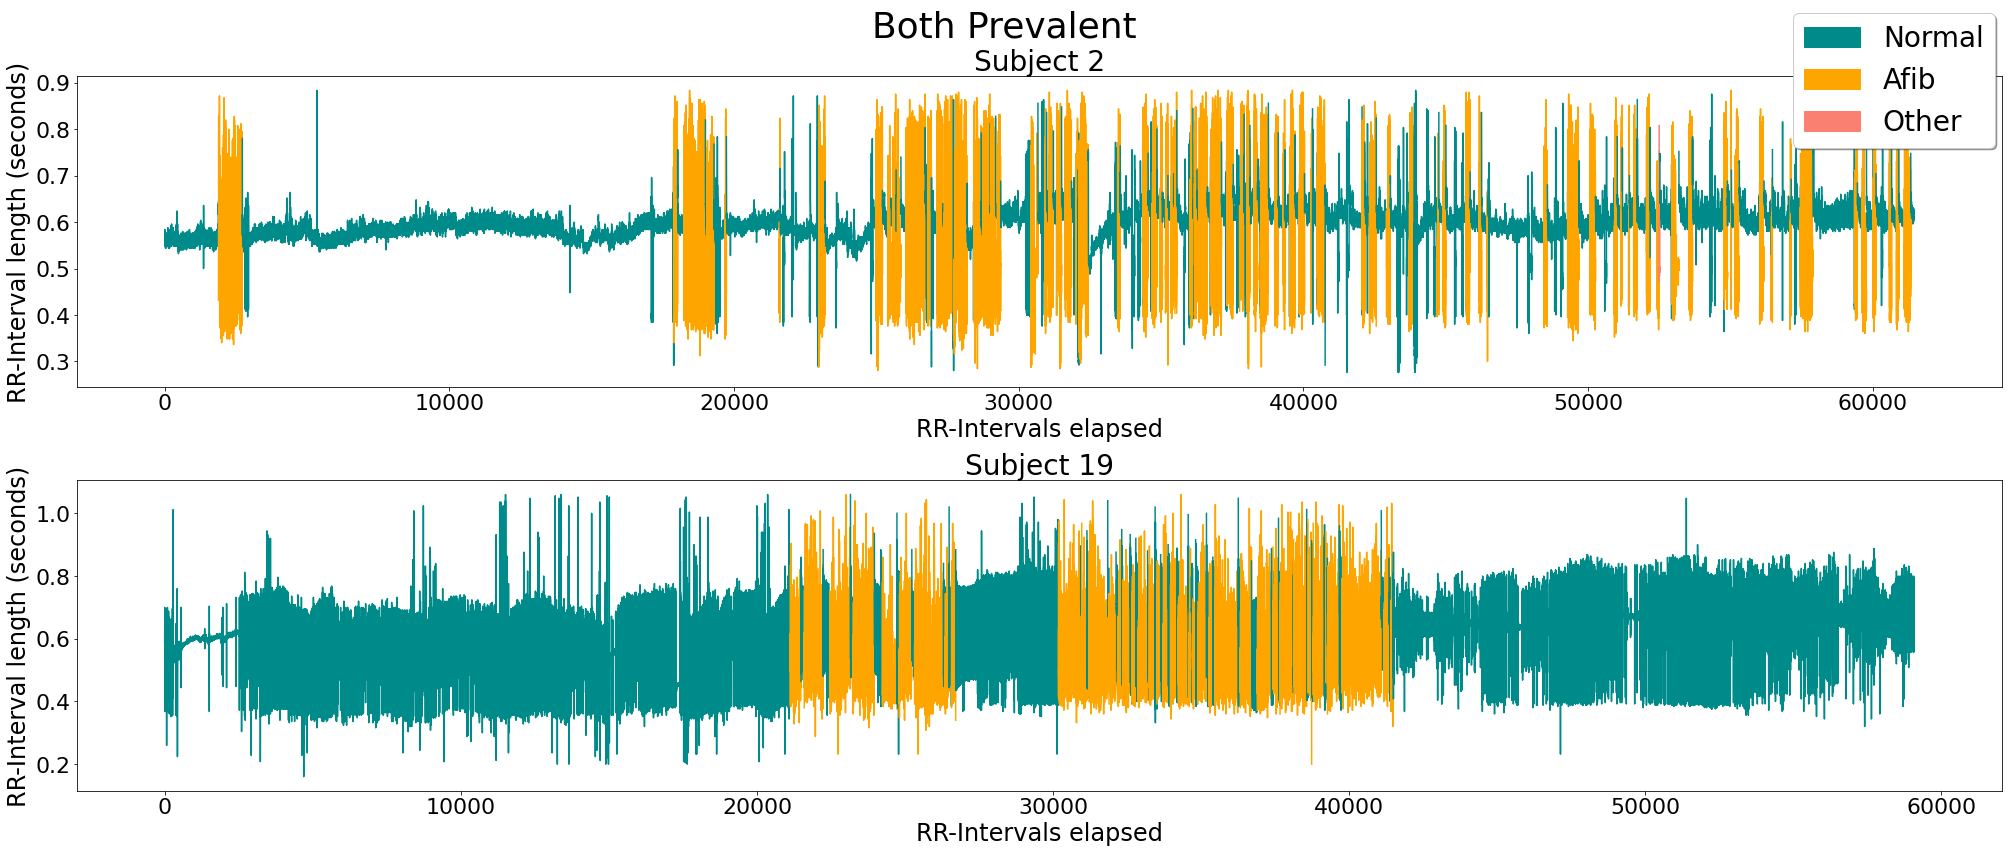

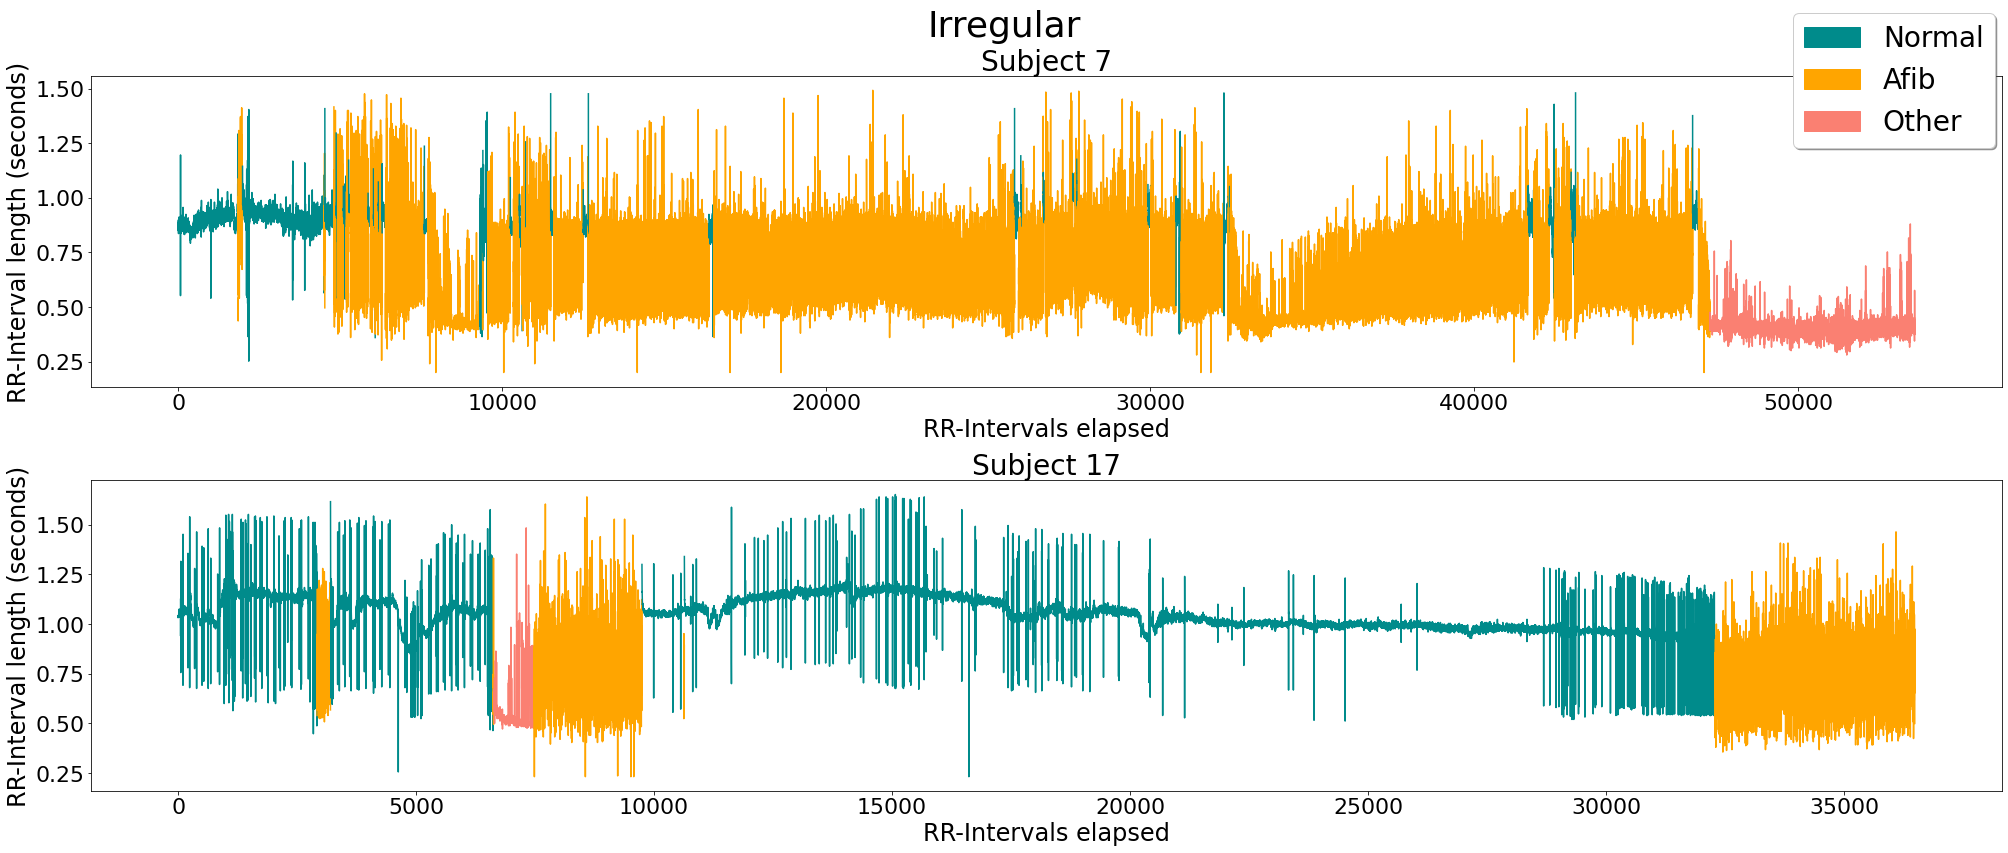

In [30]:
plot_time_plot([1, 10], 2, 1, 'Primarily Normal')
plot_time_plot([15, 21], 2, 1, 'Primarily Afib')
plot_time_plot([2, 19], 2, 1, 'Both Prevalent')
plot_time_plot([7, 17], 2, 1, 'Irregular')